MNIST Dataset

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(train_data,train_label),(test_data,test_label) = mnist.load_data()

Display images

In [5]:
def display_digits(data,label):
    plt.figure(figsize=(12,8))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(data[i])
        plt.title(label[i], pad=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

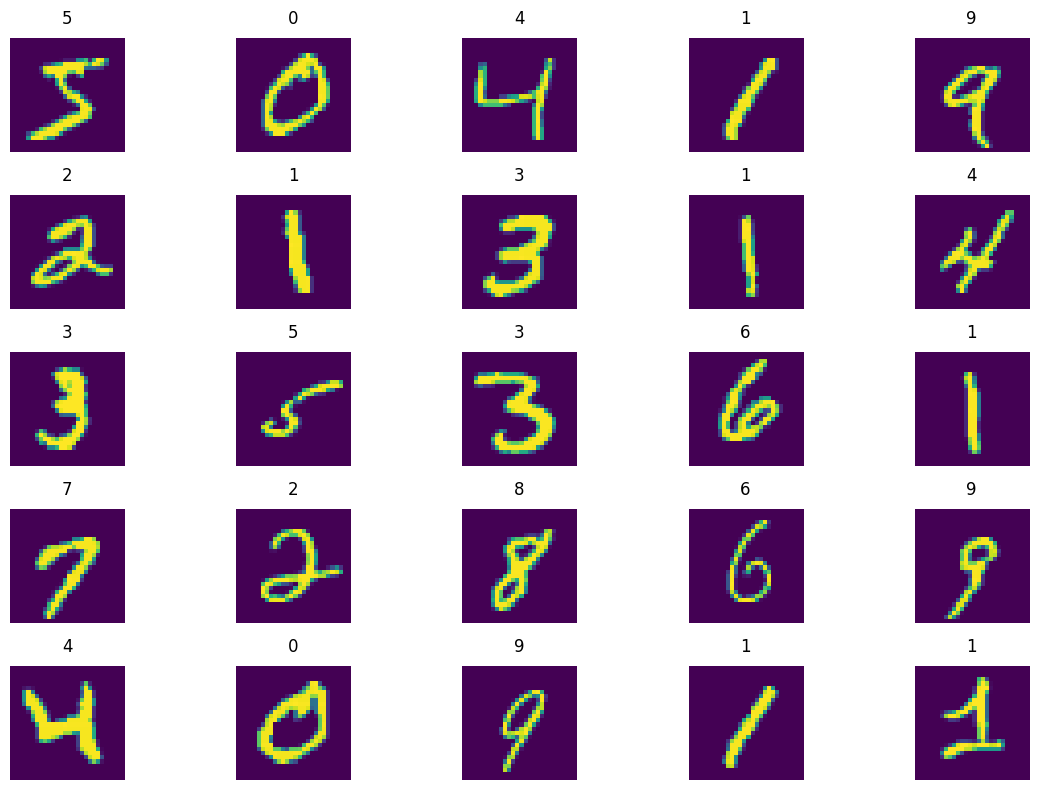

In [6]:
display_digits(train_data,train_label)

In [7]:
train_data.shape

(60000, 28, 28)

In [8]:
train_data = train_data / 255.0
test_data = test_data / 255.0

In [9]:
train_data[0].shape

(28, 28)

In [10]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=train_data[0].shape),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)
])
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics='accuracy')

In [11]:
class CustomCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs=None):
        if logs['loss'] < 0.2 and logs['accuracy'] > 0.97:
            print(f"\n loss is less({logs['loss']}). So we can stop trainng.")
            self.model.stop_training = True

In [12]:
model.fit(train_data,train_label,epochs=100,callbacks=[CustomCallbacks()])

Epoch 1/100
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2507 - accuracy: 0.9286
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1108 - accuracy: 0.9669
Epoch 3/100
1865/1875 [============================>.] - ETA: 0s - loss: 0.0776 - accuracy: 0.9765
 loss is less(0.07751736789941788). So we can stop trainng.
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0775 - accuracy: 0.9766


In [13]:
predictions = model.predict(test_data)

313/313 [==============================] - 1s 2ms/step


In [14]:
predicted_classes = np.argmax(predictions,axis=1)

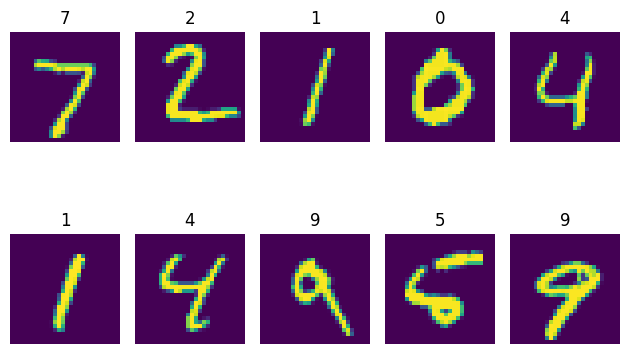

In [15]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title(predicted_classes[i])
    plt.axis('off')
    plt.imshow(test_data[i])
plt.tight_layout()
plt.show()

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(predicted_classes,test_label)

0.9744